In [25]:
# Make sure that you have all these libaries available to run the code successfully
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json 
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [26]:
import os
import pandas as pd
from pathlib import Path

# Define the input and output directories
input_dir = Path(r"D:\MLPROJECTS\MoneyVest1\companydataset")
output_dir = input_dir / "cleaned"
output_dir.mkdir(exist_ok=True)

# Iterate over all CSV files in the input directory
for csv_file in input_dir.glob("*.csv"):
    try:
        # Read the CSV file
        df = pd.read_csv(csv_file)

        # Drop duplicate rows
        df = df.drop_duplicates()

        # Handle missing values
        # For numerical columns, fill missing values with the mean
        num_cols = df.select_dtypes(include=['float64', 'int64']).columns
        df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

        # For categorical columns, fill missing values with the mode
        cat_cols = df.select_dtypes(include=['object']).columns
        for col in cat_cols:
            if not df[col].mode().empty:
                df[col] = df[col].fillna(df[col].mode()[0])
            else:
                df[col] = df[col].fillna('Unknown')

        # Convert date columns to datetime format (if any)
        # Uncomment and modify the following lines as needed
        # date_cols = ['your_date_column1', 'your_date_column2']
        # for col in date_cols:
        #     df[col] = pd.to_datetime(df[col], errors='coerce')

        # Save the cleaned DataFrame to the output directory
        output_file = output_dir / csv_file.name
        df.to_csv(output_file, index=False)

        print(f"Cleaned and saved: {output_file}")
    except Exception as e:
        print(f"Error processing {csv_file.name}: {e}")


Cleaned and saved: D:\MLPROJECTS\MoneyVest1\companydataset\cleaned\ADANIPORTS.csv
Cleaned and saved: D:\MLPROJECTS\MoneyVest1\companydataset\cleaned\ASIANPAINT.csv
Cleaned and saved: D:\MLPROJECTS\MoneyVest1\companydataset\cleaned\AXISBANK.csv
Cleaned and saved: D:\MLPROJECTS\MoneyVest1\companydataset\cleaned\BAJAJ-AUTO.csv
Cleaned and saved: D:\MLPROJECTS\MoneyVest1\companydataset\cleaned\BAJAJFINSV.csv
Cleaned and saved: D:\MLPROJECTS\MoneyVest1\companydataset\cleaned\BAJFINANCE.csv
Cleaned and saved: D:\MLPROJECTS\MoneyVest1\companydataset\cleaned\BHARTIARTL.csv
Cleaned and saved: D:\MLPROJECTS\MoneyVest1\companydataset\cleaned\BPCL.csv
Cleaned and saved: D:\MLPROJECTS\MoneyVest1\companydataset\cleaned\BRITANNIA.csv
Cleaned and saved: D:\MLPROJECTS\MoneyVest1\companydataset\cleaned\CIPLA.csv
Cleaned and saved: D:\MLPROJECTS\MoneyVest1\companydataset\cleaned\COALINDIA.csv
Cleaned and saved: D:\MLPROJECTS\MoneyVest1\companydataset\cleaned\DRREDDY.csv
Cleaned and saved: D:\MLPROJECTS\M

In [27]:
import os
import pandas as pd

# Define the directory containing your CSV files
directory = r"D:\MLPROJECTS\MoneyVest1\companydataset"

# List all CSV files in the directory
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

# Function to assess a single CSV file
def assess_file(file_path):
    try:
        # Load the CSV file
        df = pd.read_csv(file_path)
        
        # Check for essential columns
        required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
        missing_columns = [col for col in required_columns if col not in df.columns]
        
        # Check for missing values
        missing_values = df.isnull().sum()
        
        # Check for duplicate rows
        duplicate_rows = df.duplicated().sum()
        
        # Print assessment results
        print(f"Assessment for {file_path}:")
        if missing_columns:
            print(f"  Missing columns: {', '.join(missing_columns)}")
        else:
            print("  All required columns are present.")
        
        print(f"  Missing values per column:\n{missing_values}")
        print(f"  Number of duplicate rows: {duplicate_rows}")
        print("-" * 50)
    
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        print("-" * 50)

# Assess each CSV file in the directory
for csv_file in csv_files:
    file_path = os.path.join(directory, csv_file)
    assess_file(file_path)


Assessment for D:\MLPROJECTS\MoneyVest1\companydataset\ADANIPORTS.csv:
  All required columns are present.
  Missing values per column:
Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64
  Number of duplicate rows: 0
--------------------------------------------------
Assessment for D:\MLPROJECTS\MoneyVest1\companydataset\ASIANPAINT.csv:
  All required columns are present.
  Missing values per column:
Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
V

In [28]:
import pandas as pd
import glob
import os

# Define the path to your folder
path = r'D:\MLPROJECTS\MoneyVest1\companydataset'

# Get a list of all CSV files in the folder
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Read and concatenate all CSV files into a single DataFrame
df = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)

# Display the first few rows of the combined DataFrame
print(df.head())


         Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP      Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366.0  2.687719e+15     NaN           9859619.0   
1  893.90  941.38   4581338.0  4.312765e+14     NaN           1453278.0   
2  884.20  888.09   5124121.0  4.550658e+14     NaN           1069678.0   
3  921.55  929.17   4609762.0  4.283257e+14     NaN           1260913.0   
4  969.30  965.65   2977470.0  2.875200e+14     NaN            816123.0   

   %Deliverble Company Name Industry ISIN Code  
0       0.3612          N

C:\Users\jiten\AppData\Local\Temp\ipykernel_1652\963759139.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)


In [29]:
# Sort dataframe by date
df = df.sort_values('Date')

# Double check the result
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Company Name,Industry,ISIN Code
270686,2000-01-03,IOC,EQ,254.00,260.0,273.25,250.0,267.35,270.85,258.55,23700.0,6.127648e+11,NaN,NaN,NaN,NaN,NaN,NaN
422398,2000-01-03,TELCO,EQ,201.60,207.4,217.25,207.4,217.00,216.75,214.28,676126.0,1.448775e+13,NaN,NaN,NaN,NaN,NaN,NaN
440784,2000-01-03,TITAN,EQ,144.95,146.0,156.45,146.0,155.00,155.70,154.36,23000.0,3.550370e+11,NaN,NaN,NaN,NaN,NaN,NaN
454517,2000-01-03,SESAGOA,EQ,107.70,111.0,116.35,108.0,116.35,116.35,114.80,20371.0,2.338597e+11,NaN,NaN,NaN,NaN,NaN,NaN
106895,2000-01-03,INDUSINDBK,EQ,26.80,28.9,28.95,28.0,28.95,28.95,28.69,107224.0,3.075827e+11,NaN,NaN,NaN,NaN,NaN,NaN


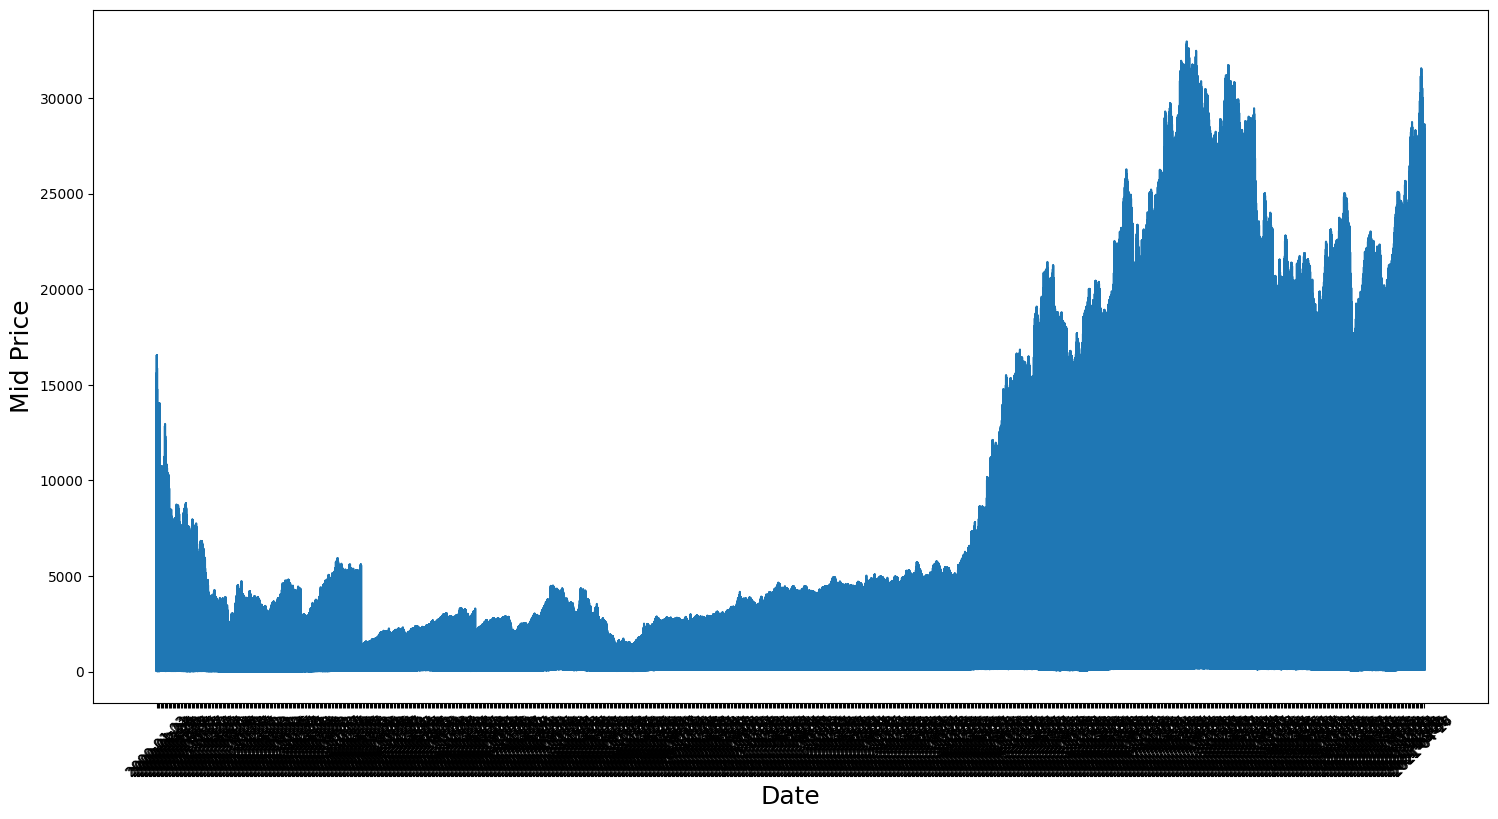

In [30]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [32]:
# Calculate the mid prices from the highest and lowest
high_prices = df['High'].values
low_prices = df['Low'].values
mid_prices = (high_prices + low_prices) / 2.0


In [33]:
train_data = mid_prices[:11000]
test_data = mid_prices[11000:]

In [34]:
# Scale the data to be between 0 and 1
# When scaling remember! You normalize both test and train data w.r.t training data
# Because you are not supposed to have access to test data
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [35]:
# Train the Scaler with training data and smooth data 
smoothing_window_size = 2500
for di in range(0,10000,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# You normalize the last bit of remaining data 
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

In [36]:

# Reshape both train and test data
train_data = train_data.reshape(-1)

# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)


In [37]:

# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
EMA = 0.0
gamma = 0.1
for ti in range(11000):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)

In [38]:
window_size = 100
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):
    
    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = df.loc[pred_idx,'Date']
        
    std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for standard averaging: 0.00049


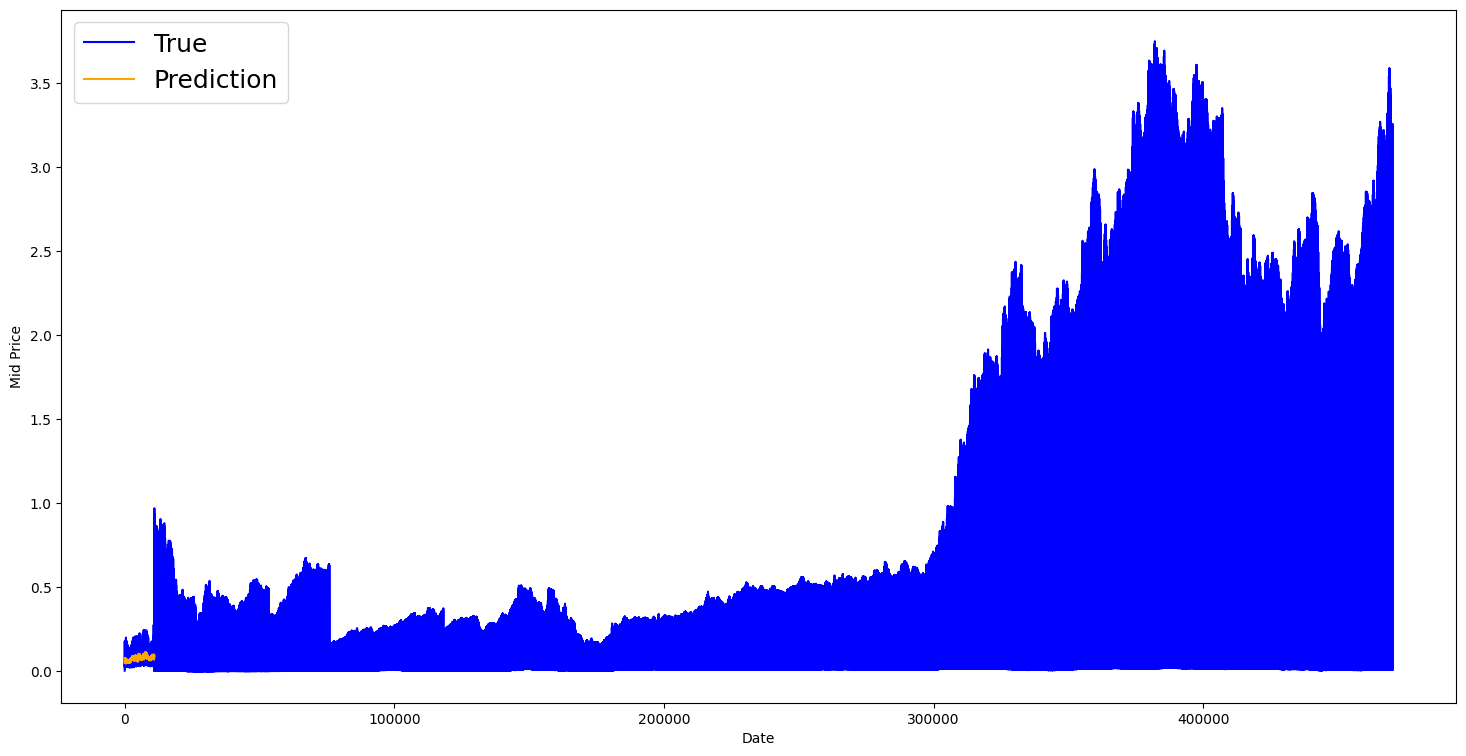

In [39]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [40]:
window_size = 100
N = train_data.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):
    
    running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
    run_avg_x.append(date)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for EMA averaging: 0.00015


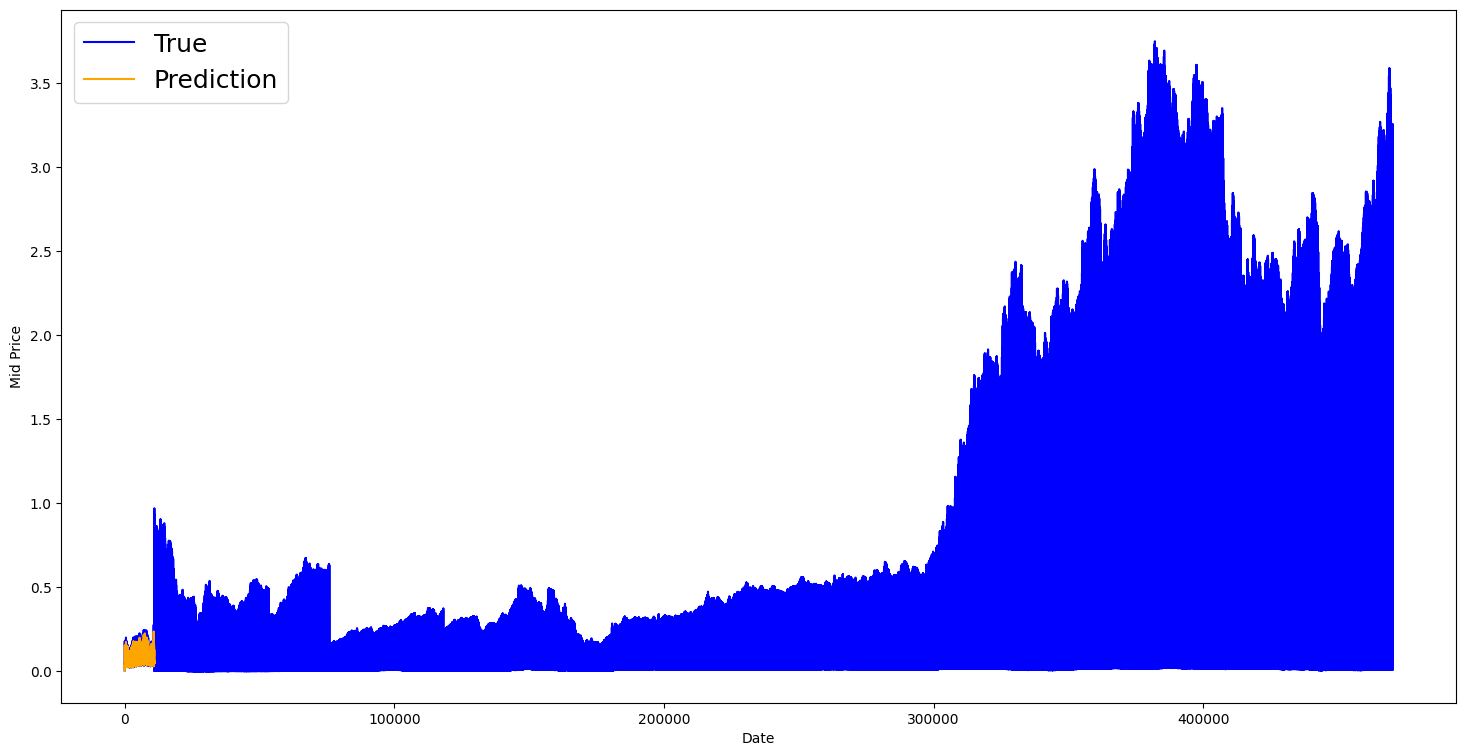

In [41]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [42]:
class DataGeneratorSeq(object):
    
    def __init__(self,prices,batch_size,num_unroll):
        self._prices = prices
        self._prices_length = len(self._prices) - num_unroll
        self._batch_size = batch_size
        self._num_unroll = num_unroll
        self._segments = self._prices_length //self._batch_size
        self._cursor = [offset * self._segments for offset in range(self._batch_size)]

    def next_batch(self):
        
        batch_data = np.zeros((self._batch_size),dtype=np.float32)
        batch_labels = np.zeros((self._batch_size),dtype=np.float32)
        
        for b in range(self._batch_size):
            if self._cursor[b]+1>=self._prices_length:
                #self._cursor[b] = b * self._segments
                self._cursor[b] = np.random.randint(0,(b+1)*self._segments)
                
            batch_data[b] = self._prices[self._cursor[b]]
            batch_labels[b]= self._prices[self._cursor[b]+np.random.randint(1,5)]
            
            self._cursor[b] = (self._cursor[b]+1)%self._prices_length
            
        return batch_data,batch_labels
    
    def unroll_batches(self):
            
        unroll_data,unroll_labels = [],[]
        init_data, init_label = None,None
        for ui in range(self._num_unroll):
            
            data, labels = self.next_batch()    

            unroll_data.append(data)
            unroll_labels.append(labels)

        return unroll_data, unroll_labels
    
    def reset_indices(self):
        for b in range(self._batch_size):
            self._cursor[b] = np.random.randint(0,min((b+1)*self._segments,self._prices_length-1))
        


dg = DataGeneratorSeq(train_data,5,5)
u_data, u_labels = dg.unroll_batches()

for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):   
    print('\n\nUnrolled index %d'%ui)
    dat_ind = dat
    lbl_ind = lbl
    print('\tInputs: ',dat )
    print('\n\tOutput:',lbl)



Unrolled index 0
	Inputs:  [0.00144053 0.04461035 0.05109011 0.05874527 0.05709307]

	Output: [0.00291849 0.03679714 0.04745292 0.05866545 0.06277615]


Unrolled index 1
	Inputs:  [0.00243896 0.04029381 0.04745292 0.05866545 0.05596063]

	Output: [0.00521283 0.0480812  0.04641916 0.05307404 0.06277615]


Unrolled index 2
	Inputs:  [0.00296815 0.04342627 0.04951208 0.05307404 0.06277615]

	Output: [0.00521283 0.0480812  0.0377391  0.04991738 0.04909474]


Unrolled index 3
	Inputs:  [0.00320834 0.04047158 0.04641916 0.05256898 0.05695916]

	Output: [0.01847823 0.04833125 0.04479165 0.05541999 0.0522312 ]


Unrolled index 4
	Inputs:  [0.00291849 0.03679714 0.04479165 0.04991738 0.0522312 ]

	Output: [0.02615635 0.04833125 0.03522029 0.04352145 0.04909474]


In [44]:
import tensorflow as tf

# Set random seed for reproducibility
tf.random.set_seed(42)

# Define model parameters
D = 1  # Dimensionality of the data
num_unrollings = 50  # Number of time steps to look into the future
batch_size = 500  # Number of samples in a batch
num_nodes = [200, 200, 150]  # Number of hidden nodes in each LSTM layer
n_layers = len(num_nodes)  # Number of LSTM layers
dropout = 0.2  # Dropout rate

# Build the LSTM model using Keras Sequential API
model = tf.keras.Sequential()

# Add LSTM layers
for i in range(n_layers):
    return_sequences = i < n_layers - 1  # Return sequences for all layers except the last
    model.add(tf.keras.layers.LSTM(
        units=num_nodes[i],
        return_sequences=return_sequences,
        dropout=dropout
    ))

# Add the output layer
model.add(tf.keras.layers.Dense(1))  # Assuming a single output value

# Compile the model
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

# Model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
import tensorflow as tf

# Define model parameters
D = 1  # Dimensionality of the data
num_unrollings = 50  # Number of time steps to look into the future
batch_size = 500  # Number of samples in a batch

# Create an Input layer
inputs = tf.keras.Input(shape=(num_unrollings, D), batch_size=batch_size, name='input_layer')

# Build the LSTM model
x = tf.keras.layers.LSTM(200, return_sequences=True, dropout=0.2)(inputs)
x = tf.keras.layers.LSTM(200, return_sequences=True, dropout=0.2)(x)
x = tf.keras.layers.LSTM(150, dropout=0.2)(x)
outputs = tf.keras.layers.Dense(1)(x)

# Compile the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (500, 50, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (500, 50, 200)         │       161,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (500, 50, 200)         │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (500, 150)             │       210,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (500, 1)               │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,151 (2.64 MB)

 Trainable params: 693,151 (2.64 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
import tensorflow as tf

# Define model parameters
num_nodes = [200, 200, 150]  # Number of units in each LSTM layer
dropout = 0.2  # Dropout rate

# Create a list of LSTM cells with dropout
lstm_cells = []
for units in num_nodes:
    cell = tf.keras.layers.LSTMCell(
        units=units,
        dropout=dropout,
        kernel_initializer=tf.keras.initializers.GlorotUniform()
    )
    lstm_cells.append(cell)

# Stack the LSTM cells into a multi-layer RNN
multi_rnn_cell = tf.keras.layers.StackedRNNCells(lstm_cells)

# Wrap the multi-layer RNN into an RNN layer
rnn_layer = tf.keras.layers.RNN(multi_rnn_cell)

# Define the input shape
input_shape = (None, None, num_nodes[0])  # (batch_size, time_steps, features)

# Create the model
inputs = tf.keras.Input(shape=input_shape[1:])
outputs = rnn_layer(inputs)
outputs = tf.keras.layers.Dense(1)(outputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, 200)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn (RNN)                       │ (None, 150)            │       852,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 852,351 (3.25 MB)

 Trainable params: 852,351 (3.25 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
import tensorflow as tf

# Define model parameters
num_nodes = [200, 200, 150]  # Number of units in each LSTM layer
dropout = 0.2  # Dropout rate
input_shape = (50, 1)  # Example input shape: 50 time steps with 1 feature

# Build the model
model = tf.keras.Sequential()

# Add LSTM layers
for i, units in enumerate(num_nodes):
    return_sequences = i < len(num_nodes) - 1  # Return sequences for all layers except the last
    model.add(tf.keras.layers.LSTM(
        units=units,
        return_sequences=return_sequences,
        dropout=dropout,
        kernel_initializer=tf.keras.initializers.GlorotUniform()
    ))

# Add the output layer
model.add(tf.keras.layers.Dense(1))  # Assuming a single output value

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [52]:
import tensorflow as tf

def custom_sequence_loss(y_true, y_pred):
    """
    Computes the mean squared error across all time steps.

    Args:
        y_true: Tensor of true values with shape (batch_size, time_steps, 1)
        y_pred: Tensor of predicted values with shape (batch_size, time_steps, 1)

    Returns:
        Scalar tensor representing the loss.
    """
    return tf.reduce_mean(tf.square(y_true - y_pred))


In [53]:
model.compile(optimizer='adam', loss=custom_sequence_loss)


In [54]:
initial_learning_rate = 0.01
decay_steps = 1
decay_rate = 0.5
min_learning_rate = 1e-5

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=True
)

# To ensure the learning rate doesn't go below a minimum value
def lr_with_minimum(step):
    return tf.math.maximum(lr_schedule(step), min_learning_rate)


In [57]:
import tensorflow as tf

def compute_loss(y_true, y_pred):
    """
    Computes the Mean Squared Error between true and predicted values.

    Args:
        y_true: Tensor of true values.
        y_pred: Tensor of predicted values.

    Returns:
        Scalar tensor representing the loss.
    """
    return tf.reduce_mean(tf.square(y_true - y_pred))


In [ ]:
import tensorflow as tf

# 1. Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(1)
])

# 2. Define the loss function
loss_fn = tf.keras.losses.MeanSquaredError()

# 3. Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# 4. Prepare the dataset
# Assume 'train_dataset' is a tf.data.Dataset object yielding (inputs, targets)
# For example:
# train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)

# 5. Training loop
epochs = 10
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    for step, (inputs, targets) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            # Forward pass
            predictions = model(inputs, training=True)
            # Compute loss
            loss = loss_fn(targets, predictions)
        
        # Compute gradients
        gradients = tape.gradient(loss, model.trainable_variables)
        # Optionally, clip gradients to prevent exploding gradients
        clipped_gradients = [tf.clip_by_norm(g, 5.0) for g in gradients]
        # Apply gradients to update model weights
        optimizer.apply_gradients(zip(clipped_gradients, model.trainable_variables))
        
        if step % 100 == 0:
            print(f"Step {step}, Loss: {loss.numpy():.4f}")



NameError: name 'targets' is not defined

In [55]:
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_with_minimum)

# Assume 'model' is your tf.keras.Model instance
with tf.GradientTape() as tape:
    predictions = model(inputs)  # Replace 'inputs' with your actual input tensor
    loss = compute_loss(predictions, targets)  # Define this function as per your loss computation

gradients = tape.gradient(loss, model.trainable_variables)
clipped_gradients = [tf.clip_by_norm(g, 5.0) for g in gradients]
optimizer.apply_gradients(zip(clipped_gradients, model.trainable_variables))


NameError: name 'compute_loss' is not defined

In [63]:
print('Defining prediction related TF functions')

sample_inputs = tf.placeholder(tf.float32, shape=[1,D])

# Maintaining LSTM state for prediction stage
sample_c, sample_h, initial_sample_state = [],[],[]
for li in range(n_layers):
  sample_c.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  sample_h.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  initial_sample_state.append(tf.contrib.rnn.LSTMStateTuple(sample_c[li],sample_h[li]))

reset_sample_states = tf.group(*[tf.assign(sample_c[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)],
                               *[tf.assign(sample_h[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)])

sample_outputs, sample_state = tf.nn.dynamic_rnn(multi_cell, tf.expand_dims(sample_inputs,0),
                                   initial_state=tuple(initial_sample_state),
                                   time_major = True,
                                   dtype=tf.float32)

with tf.control_dependencies([tf.assign(sample_c[li],sample_state[li][0]) for li in range(n_layers)]+
                              [tf.assign(sample_h[li],sample_state[li][1]) for li in range(n_layers)]):  
  sample_prediction = tf.nn.xw_plus_b(tf.reshape(sample_outputs,[1,-1]), w, b)

print('\tAll done')

Defining prediction related TF functions


AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [64]:
import tensorflow as tf

# Define the dimensionality of the data
D = 1  # Adjust as per your data

# Define the input layer
sample_inputs = tf.keras.Input(shape=(D,), dtype=tf.float32, name='sample_inputs')

# Example: Define a simple model using the input layer
x = tf.keras.layers.Dense(64, activation='relu')(sample_inputs)
output = tf.keras.layers.Dense(1)(x)

# Create the model
model = tf.keras.Model(inputs=sample_inputs, outputs=output)

# Display the model summary
model.summary()


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sample_inputs (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [66]:
import tensorflow as tf

# Define your input shape; for example, if your input data has 10 features:
input_shape = (10,)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])


In [69]:
import tensorflow as tf

# Sample data
train_data = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
train_labels = tf.constant([0, 1, 0])

# Creating the dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))

# Iterating through the dataset
for features, label in train_dataset:
    print(f"Features: {features.numpy()}, Label: {label.numpy()}")


Features: [1. 2.], Label: 0
Features: [3. 4.], Label: 1
Features: [5. 6.], Label: 0


In [71]:
import numpy as np

# Example: Creating dummy test data with 100 samples and 10 features
test_data = np.random.rand(100, 10)

# Example: Creating dummy test labels (e.g., binary classification)
test_labels = np.random.randint(0, 2, size=(100,))


In [72]:
import tensorflow as tf

# Creating the test dataset
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))

# Optional: Batch the dataset
batch_size = 32
test_dataset = test_dataset.batch(batch_size)

# Optional: Prefetch for performance optimization
test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)


In [73]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))
test_dataset = test_dataset.batch(batch_size)


In [74]:
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)


In [79]:
import tensorflow as tf
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate synthetic training data
num_samples = 1000
num_features = 10

train_data = np.random.rand(num_samples, num_features).astype(np.float32)
train_labels = np.random.randint(0, 2, size=(num_samples,)).astype(np.float32)

# Generate synthetic test data
test_data = np.random.rand(200, num_features).astype(np.float32)
test_labels = np.random.randint(0, 2, size=(200,)).astype(np.float32)

# Create TensorFlow datasets
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))
test_dataset = test_dataset.batch(batch_size)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(num_features,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Define loss function and optimizer
loss_fn = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam()

# Define metrics
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.BinaryAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.BinaryAccuracy(name='test_accuracy')

# Define training and test steps
@tf.function
def train_step(features, labels):
    with tf.GradientTape() as tape:
        predictions = model(features, training=True)
        loss = loss_fn(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, predictions)

@tf.function
def test_step(features, labels):
    predictions = model(features, training=False)
    loss = loss_fn(labels, predictions)

    test_loss(loss)
    test_accuracy(labels, predictions)

# Training loop
epochs = 10
for epoch in range(epochs):
    # Reset metrics at the start of each epoch
    train_loss.reset_state()
    train_accuracy.reset_state()
    test_loss.reset_state()
    test_accuracy.reset_state()


    for features, labels in train_dataset:
        train_step(features, labels)

    for test_features, test_labels in test_dataset:
        test_step(test_features, test_labels)

    print(
        f"Epoch {epoch + 1}, "
        f"Train Loss: {train_loss.result():.4f}, "
        f"Train Accuracy: {train_accuracy.result():.4f}, "
        f"Test Loss: {test_loss.result():.4f}, "
        f"Test Accuracy: {test_accuracy.result():.4f}"
    )


Epoch 1, Train Loss: 0.6925, Train Accuracy: 0.5060, Test Loss: 0.7041, Test Accuracy: 0.4400
Epoch 2, Train Loss: 0.6923, Train Accuracy: 0.5110, Test Loss: 0.7060, Test Accuracy: 0.4500
Epoch 3, Train Loss: 0.6903, Train Accuracy: 0.5190, Test Loss: 0.7028, Test Accuracy: 0.4350
Epoch 4, Train Loss: 0.6890, Train Accuracy: 0.5330, Test Loss: 0.7016, Test Accuracy: 0.4800
Epoch 5, Train Loss: 0.6870, Train Accuracy: 0.5430, Test Loss: 0.7000, Test Accuracy: 0.5000
Epoch 6, Train Loss: 0.6873, Train Accuracy: 0.5460, Test Loss: 0.6986, Test Accuracy: 0.5300
Epoch 7, Train Loss: 0.6868, Train Accuracy: 0.5490, Test Loss: 0.6977, Test Accuracy: 0.5350
Epoch 8, Train Loss: 0.6869, Train Accuracy: 0.5350, Test Loss: 0.6972, Test Accuracy: 0.5300
Epoch 9, Train Loss: 0.6850, Train Accuracy: 0.5520, Test Loss: 0.6989, Test Accuracy: 0.5250
Epoch 10, Train Loss: 0.6836, Train Accuracy: 0.5450, Test Loss: 0.6980, Test Accuracy: 0.5050


In [80]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)


In [82]:
import tensorflow as tf
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate synthetic training data
num_samples = 1000
num_features = 10

train_data = np.random.rand(num_samples, num_features).astype(np.float32)
train_labels = np.random.randint(0, 2, size=(num_samples,)).astype(np.float32)

# Generate synthetic test data
test_data = np.random.rand(200, num_features).astype(np.float32)
test_labels = np.random.randint(0, 2, size=(200,)).astype(np.float32)

# Create TensorFlow datasets
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))
test_dataset = test_dataset.batch(batch_size)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(num_features,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Define loss function and optimizer
loss_fn = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam()

# Define metrics
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.BinaryAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.BinaryAccuracy(name='test_accuracy')

# Define training and test steps
@tf.function
def train_step(features, labels):
    with tf.GradientTape() as tape:
        predictions = model(features, training=True)
        loss = loss_fn(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, predictions)

@tf.function
def test_step(features, labels):
    predictions = model(features, training=False)
    loss = loss_fn(labels, predictions)

    test_loss(loss)
    test_accuracy(labels, predictions)

# Training loop
epochs = 10
for epoch in range(epochs):
    # Reset metrics at the start of each epoch
    train_loss.reset_state()
    train_accuracy.reset_state()
    test_loss.reset_state()
    test_accuracy.reset_state()

    for features, labels in train_dataset:
        train_step(features, labels)

    for test_features, test_labels in test_dataset:
        test_step(test_features, test_labels)

    print(
        f"Epoch {epoch + 1}, "
        f"Train Loss: {train_loss.result():.4f}, "
        f"Train Accuracy: {train_accuracy.result():.4f}, "
        f"Test Loss: {test_loss.result():.4f}, "
        f"Test Accuracy: {test_accuracy.result():.4f}"
    )


Epoch 1, Train Loss: 0.6941, Train Accuracy: 0.5060, Test Loss: 0.7007, Test Accuracy: 0.4550
Epoch 2, Train Loss: 0.6921, Train Accuracy: 0.5340, Test Loss: 0.7029, Test Accuracy: 0.4350
Epoch 3, Train Loss: 0.6897, Train Accuracy: 0.5370, Test Loss: 0.7004, Test Accuracy: 0.4450
Epoch 4, Train Loss: 0.6887, Train Accuracy: 0.5490, Test Loss: 0.7001, Test Accuracy: 0.4500
Epoch 5, Train Loss: 0.6864, Train Accuracy: 0.5420, Test Loss: 0.6989, Test Accuracy: 0.4800
Epoch 6, Train Loss: 0.6868, Train Accuracy: 0.5420, Test Loss: 0.6973, Test Accuracy: 0.4950
Epoch 7, Train Loss: 0.6858, Train Accuracy: 0.5520, Test Loss: 0.6978, Test Accuracy: 0.5050
Epoch 8, Train Loss: 0.6861, Train Accuracy: 0.5540, Test Loss: 0.6974, Test Accuracy: 0.5050
Epoch 9, Train Loss: 0.6845, Train Accuracy: 0.5580, Test Loss: 0.6991, Test Accuracy: 0.4900
Epoch 10, Train Loss: 0.6829, Train Accuracy: 0.5450, Test Loss: 0.6989, Test Accuracy: 0.4900


NameError: name 'predictions_over_time' is not defined

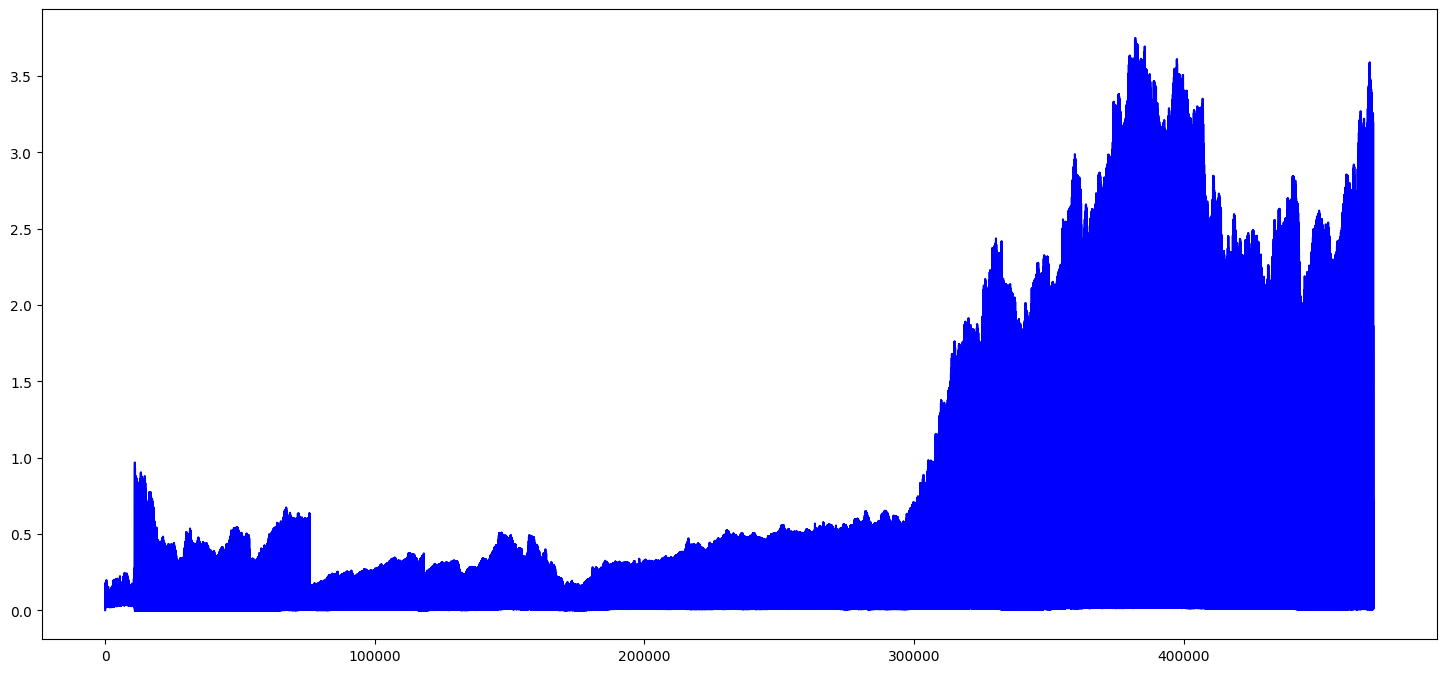

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Suppose these variables are created during your TF 2.x model training/prediction
# predictions_over_time: List[List[np.array]] or List[np.array], shape example: (num_epochs, num_predictions)
# x_axis_seq: List[np.array] corresponding to x-values for each prediction sequence
# all_mid_data: np.array or pd.Series of actual prices or values
# df: your original DataFrame used for length reference

best_prediction_epoch = 28  # Replace with the epoch index where best results occur

plt.figure(figsize=(18, 18))

# Plot the actual data
plt.subplot(2, 1, 1)
plt.plot(range(df.shape[0]), all_mid_data, color='b')

# Plot predictions over time with increasing alpha (transparency)
start_alpha = 0.25
# Take every 3rd prediction epoch for clarity
predictions_to_plot = predictions_over_time[::3]
alpha_values = np.linspace(start_alpha, 1.0, len(predictions_to_plot))

for p_i, preds in enumerate(predictions_to_plot):
    for x_vals, y_vals in zip(x_axis_seq, preds):
        plt.plot(x_vals, y_vals, color='r', alpha=alpha_values[p_i])

plt.title('Evolution of Test Predictions Over Time', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Mid Price', fontsize=18)
plt.xlim(11000, 12500)

plt.subplot(2, 1, 2)
plt.plot(range(df.shape[0]), all_mid_data, color='b')

# Plot best epoch predictions
for x_vals, y_vals in zip(x_axis_seq, predictions_over_time[best_prediction_epoch]):
    plt.plot(x_vals, y_vals, color='r')

plt.title('Best Test Predictions Over Time', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Mid Price', fontsize=18)
plt.xlim(11000, 12500)

plt.show()


c:\Users\jiten\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/30
Step 0: Train loss = 0.35744
Step 100: Train loss = 0.16154
Step 200: Train loss = 0.12631
Step 300: Train loss = 0.11361
Epoch 1 Train Loss: 0.11250
Epoch 2/30
Step 0: Train loss = 0.05920
Step 100: Train loss = 0.08367
Step 200: Train loss = 0.08273
Step 300: Train loss = 0.08305
Epoch 2 Train Loss: 0.08325
Epoch 3/30
Step 0: Train loss = 0.10791
Step 100: Train loss = 0.08148
Step 200: Train loss = 0.08206
Step 300: Train loss = 0.08295
Epoch 3 Train Loss: 0.08282
Epoch 4/30
Step 0: Train loss = 0.07127
Step 100: Train loss = 0.08128
Step 200: Train loss = 0.08225
Step 300: Train loss = 0.08276
Epoch 4 Train Loss: 0.08275
Epoch 5/30
Step 0: Train loss = 0.07597
Step 100: Train loss = 0.08159
Step 200: Train loss = 0.08175
Step 300: Train loss = 0.08276
Epoch 5 Train Loss: 0.08286
Epoch 6/30
Step 0: Train loss = 0.08048
Step 100: Train loss = 0.08138
Step 200: Train loss = 0.08174
Step 300: Train loss = 0.08257
Epoch 6 Train Loss: 0.08274
Epoch 7/30
Step 0: Train loss = 0.

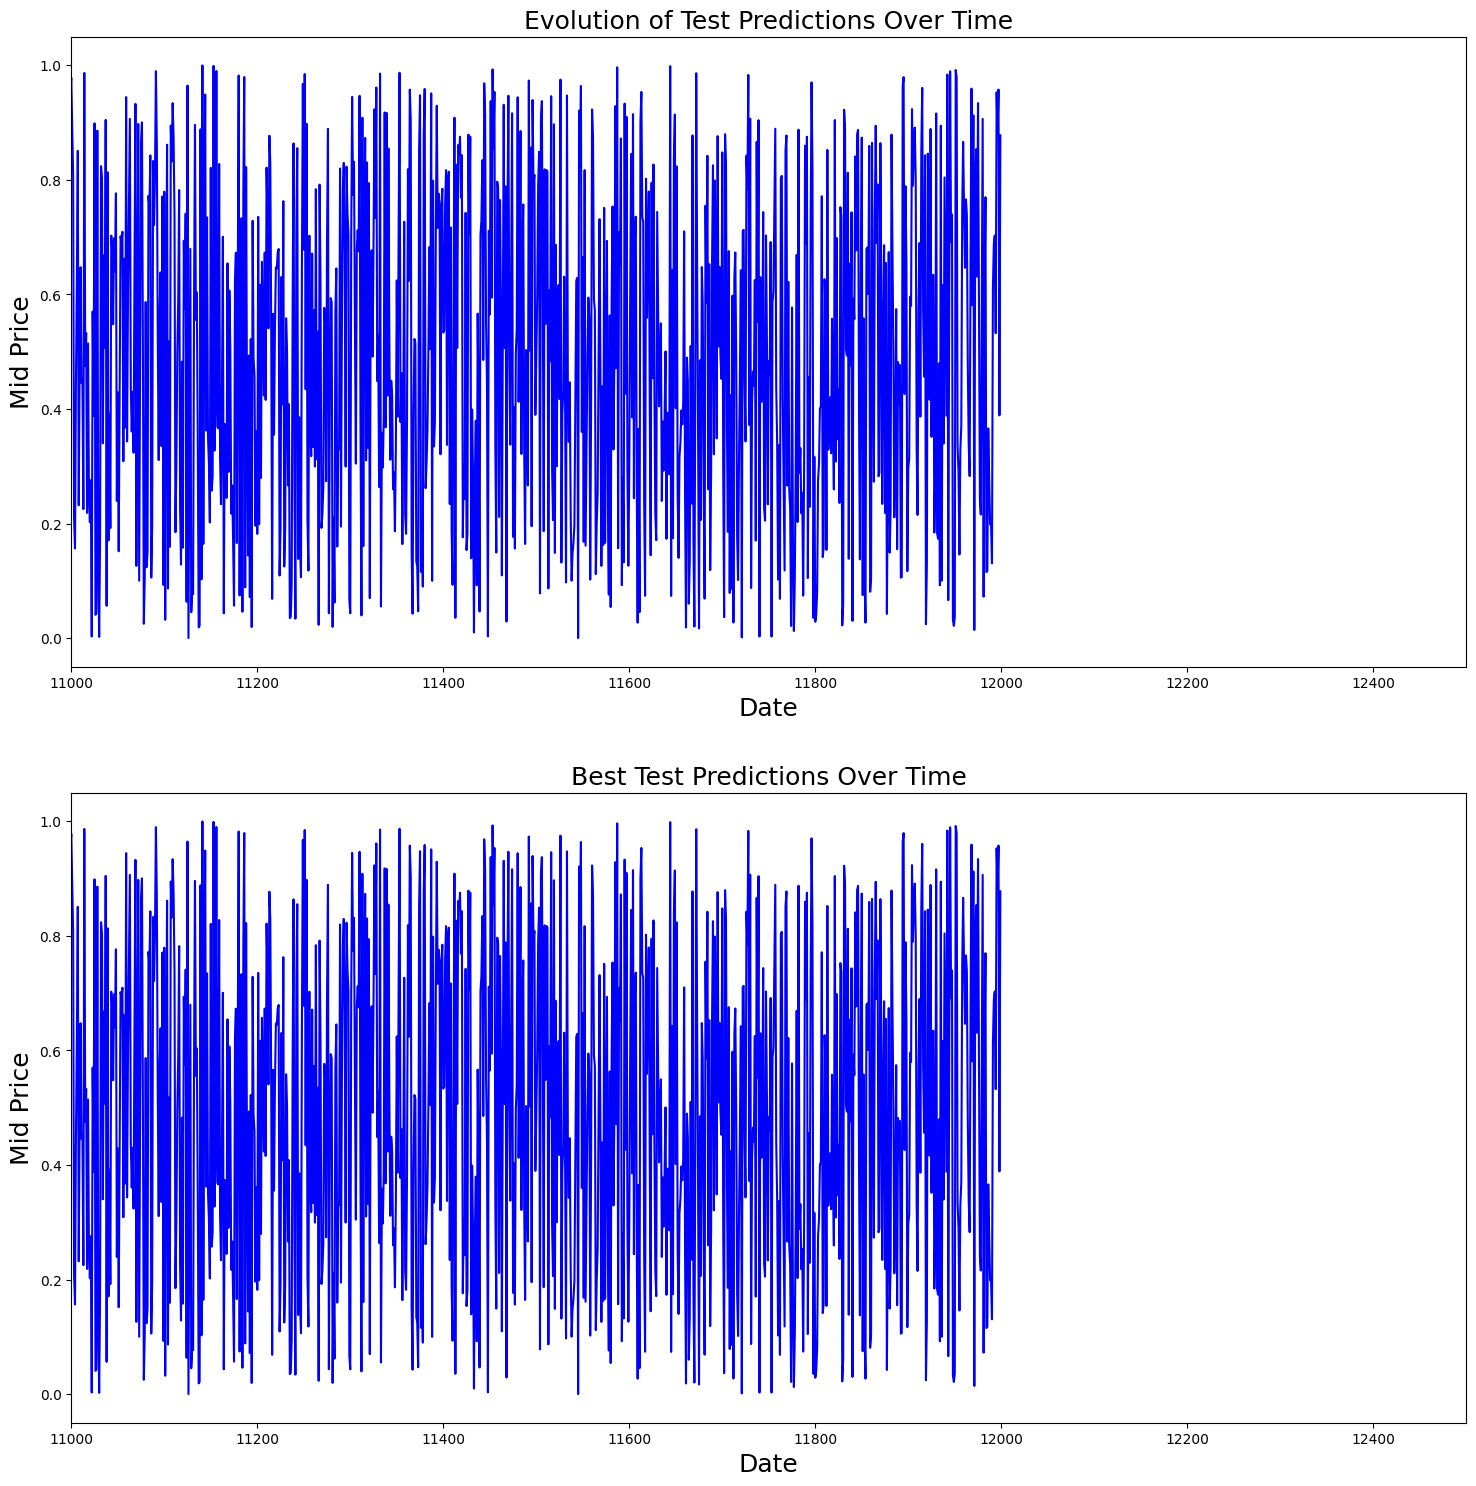

In [84]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ---- Dummy placeholders: replace with your real data ----
train_data = np.random.rand(10000, 1).astype(np.float32)  # e.g. feature sequences
train_labels = np.random.rand(10000, 1).astype(np.float32)
test_data = np.random.rand(2000, 1).astype(np.float32)
test_labels = np.random.rand(2000, 1).astype(np.float32)

all_mid_data = np.concatenate([train_data.flatten(), test_data.flatten()])  # or your actual full data
df = pd.DataFrame({'mid': all_mid_data})  # just to use df.shape[0]

batch_size = 32
epochs = 30
n_predict_once = 50

# For simplicity, assume 1D inputs and outputs
input_dim = train_data.shape[1]

# Create tf.data datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))
test_dataset = test_dataset.batch(batch_size)

# Define a simple model (modify as needed)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(input_dim,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Metrics
train_loss = tf.keras.metrics.Mean()
test_loss = tf.keras.metrics.Mean()

# Test points where to start predictions (indices within test_data)
test_points_seq = np.arange(1000, 1100, 10)  # adjust according to your data length

# Function to generate predictions from a starting index (autoregressive)
def model_predict_from_point(start_idx, n_steps):
    preds = []
    current_input = test_data[start_idx]  # shape (input_dim,)
    current_input = current_input.reshape(1, -1)
    
    for _ in range(n_steps):
        pred = model(current_input, training=False)
        pred_value = pred.numpy().flatten()[0]
        preds.append(pred_value)
        # Use prediction as next input (autoregressive)
        current_input = np.array([[pred_value]], dtype=np.float32)
    return np.array(preds)

# Containers for predictions and x-axis values
predictions_over_time = []
x_axis_seq = [np.arange(start, start + n_predict_once) for start in test_points_seq]

# Training loop
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    train_loss.reset_state()
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            predictions = model(x_batch_train, training=True)
            loss = loss_fn(y_batch_train, predictions)
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
        train_loss.update_state(loss)
        
        if step % 100 == 0:
            print(f"Step {step}: Train loss = {train_loss.result().numpy():.5f}")
    
    print(f"Epoch {epoch+1} Train Loss: {train_loss.result().numpy():.5f}")
    
    # Generate predictions on test points and store for plotting
    predictions_seq = []
    for w_i in test_points_seq:
        pred_values = model_predict_from_point(w_i, n_predict_once)
        predictions_seq.append(pred_values)
    
    predictions_over_time.append(predictions_seq)

# --- Plotting code from earlier ---
best_prediction_epoch = 28  # Or choose your best epoch

plt.figure(figsize=(18, 18))

plt.subplot(2, 1, 1)
plt.plot(range(df.shape[0]), all_mid_data, color='b')

start_alpha = 0.25
predictions_to_plot = predictions_over_time[::3]
alpha_values = np.linspace(start_alpha, 1.0, len(predictions_to_plot))

for p_i, preds in enumerate(predictions_to_plot):
    for x_vals, y_vals in zip(x_axis_seq, preds):
        plt.plot(x_vals, y_vals, color='r', alpha=alpha_values[p_i])

plt.title('Evolution of Test Predictions Over Time', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Mid Price', fontsize=18)
plt.xlim(11000, 12500)

plt.subplot(2, 1, 2)
plt.plot(range(df.shape[0]), all_mid_data, color='b')

for x_vals, y_vals in zip(x_axis_seq, predictions_over_time[best_prediction_epoch]):
    plt.plot(x_vals, y_vals, color='r')

plt.title('Best Test Predictions Over Time', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Mid Price', fontsize=18)
plt.xlim(11000, 12500)

plt.show()


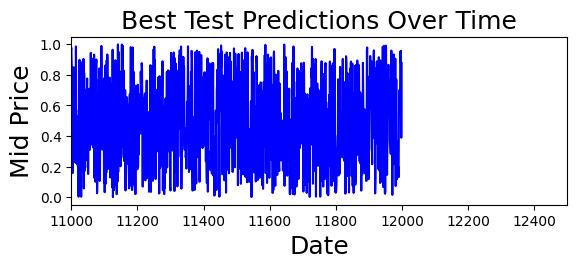

Plot saved to prediction_evolution.png


In [85]:
# ... your plotting code from before ...

plt.subplot(2, 1, 2)
plt.plot(range(df.shape[0]), all_mid_data, color='b')

for x_vals, y_vals in zip(x_axis_seq, predictions_over_time[best_prediction_epoch]):
    plt.plot(x_vals, y_vals, color='r')

plt.title('Best Test Predictions Over Time', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Mid Price', fontsize=18)
plt.xlim(11000, 12500)

# Save the figure before showing
output_filepath = "prediction_evolution.png"
plt.savefig(output_filepath, dpi=300)
plt.show()

print(f"Plot saved to {output_filepath}")


In [86]:
# Assume you have a Keras model defined and trained, e.g.:

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train your model (example)
model.fit(train_dataset, epochs=10)

# Save the entire model to an HDF5 file
model.save('model.h5')

print("Model saved as model.h5")


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - loss: 0.1608
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 0.0825
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.0818
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - loss: 0.0820
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - loss: 0.0820
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 0.0820
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 0.0822
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 0.0815
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 0.0822
Epoch 10/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 0.0819


Model saved as model.h5


In [90]:
import tensorflow as tf
import numpy as np

# Generate some dummy training data
input_dim = 5
num_samples = 1000

np.random.seed(42)
X_train = np.random.rand(num_samples, input_dim).astype(np.float32)
y_train = np.sum(X_train, axis=1, keepdims=True) + np.random.normal(0, 0.1, (num_samples, 1)).astype(np.float32)

# Define a simple model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(1)
])

# Compile model with full loss name instead of shorthand
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Save the model to model.h5
model.save('model.h5')
print("Model saved to model.h5")

# Later... Loading the model with no issues
# If loss was saved as a function or shorthand, specify in custom_objects
loaded_model = tf.keras.models.load_model('model.h5', custom_objects={'mean_squared_error': tf.keras.losses.MeanSquaredError})

# Test loaded model prediction
X_test = np.random.rand(3, input_dim).astype(np.float32)
predictions = loaded_model.predict(X_test)
print("Predictions on new data:\n", predictions)


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - loss: 4.7624 
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8646 
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - loss: 0.3080
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 0.0474
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 0.0448


Model saved to model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predictions on new data:
 [[2.2189934]
 [2.9046693]
 [3.1031857]]
